**Dane Sabo**

*dane.sabo@pitt.edu*

NUCE 2100 - Fundamentals of Nuclear Engineering

In [9]:
import numpy as np
import sympy as sm

def answer_print(question,string):
    print('\n=========FINAL ANSWER=========')
    print(question+':')
    print(string)
    print('=========FINAL ANSWER=========\n')

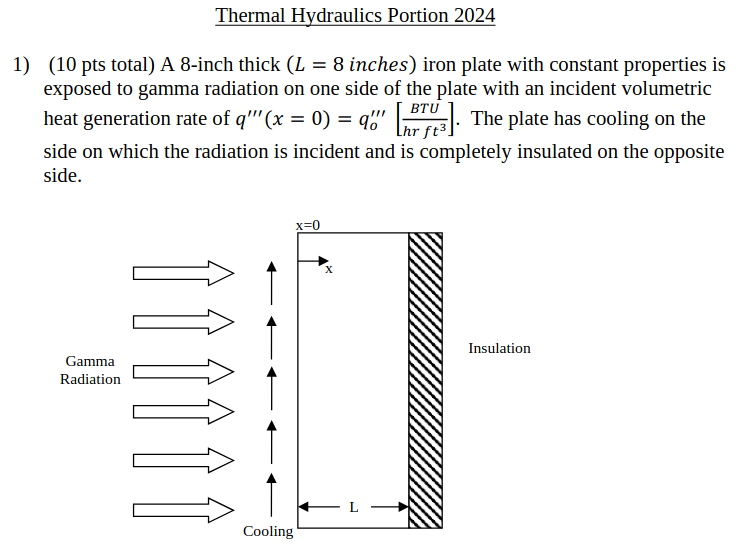

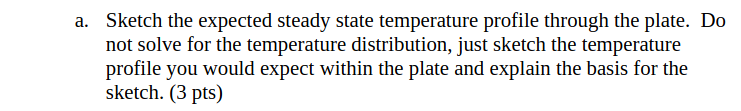

Sketch showing first order t response. flat against insulation
The gamma radiation is going to interact with the material and cause heat to build up, which will be removed by the cooling. The insulated side of the material will be flat, however, as there cannot be any flux into a completely insulated surface.

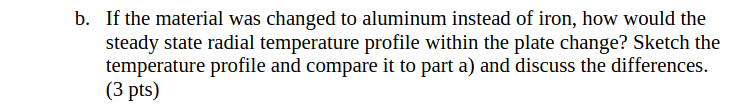

Show same sketch but steeper curve. 
Aluminum has, for energy ranges between 0.6 and ~3.0 MeV, higher absorption coefficients for gamma rays. Assuming the gamma radiation is in this range, the aluminum will take on more energy than the iron, and therefore have higher temperatures. That being said, aluminum has much higher thermal conductivity, so it is also anticipated that much more heat will be dissipated.

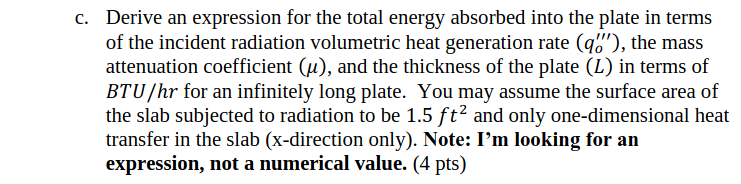

$$q'''(x) = q'''_0 e^{-\mu x}$$

$$q = \iiint q'''(x) dV$$
$$q = 1.5 [\text{ft}^2] \int_{0 [\text{ft}]}^{8 [\text{in}]} q'''(x) dx $$
$$q = 1.5 [\text{ft}^2] \int_{0 [\text{ft}]}^{8 [\text{in}]} q'''_0 e^{-\mu x} dx $$
$$q = 1.5 [\text{ft}^2] q'''_0 \frac{1}{-\mu} \left(e^{-\mu 0.75 [\text{ft}]} - 1\right) $$


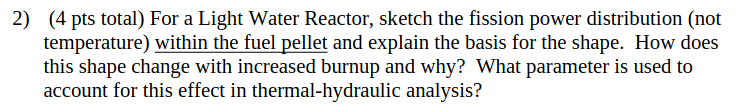

Kind of a hump shape. Module 9 Review

More burnup causes less conduction in the gap. That's because fission gasses get released into the fuel rod, reduces thermal conductivity of the gas gap. That said, conduction can also increase because the pellets crack and get pushed against the cladding, which then conducts through the solids and not gasses. 

$\alpha$ is the term used to account for this effect, in Dean's Model for a closed gap.

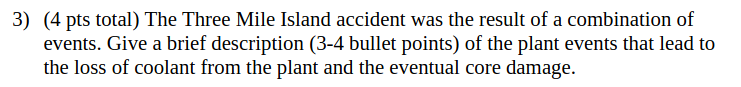

1. An open pressurizer relief valuve gets stuck open. This results in low primary coolant pressure, but it keeps sending back a 'closed' signal despite being stuck open from mechanical failure.
2. Coolant just starts dumping through pressurizer relief. Operators have no clue because they think it is closed. They're worried about going 'solid', which is when the primary system has no gas buffer and water hammer can happen.
3. Operators stop auxilliary feed into the primary system to try and avoid going solid. Little do they know this is actually causing huge problems because there is actually a huge volume loss in the primary loop. A gas bubble forms in the reactor as a result.
4. Gas bubble = no cooling > fuel temps reach ~4,000 F and slump. Coolant keeps getting dumped into system once they realize whats wrong and some of that water gets out through auxiliary systems through open PORV.
5. Coolant pumps get restarted and reactor core gets back under control. Avoids catastrophic accident.

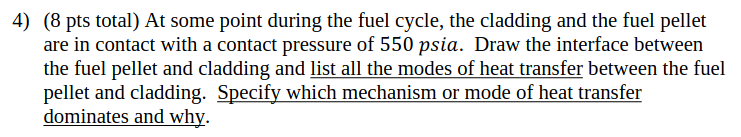

Draw figure from module 9.1

The fuel pellet and cladding have heat transfer from conductivity through the gap gas, conductivity from the pellet to the cladding, and convective heat transfer in the gap gas.

Assuming a gas conductivity on the order of ~0.1 BTU/hr-ft-F-psi, the gas conductivity will dominate as that portion of the equation will be on the order of 1e4 BTU/hr-ft^2-F-psi, while the $\alpha P_{contact}$ portion will be on the order of ~200 BTU/hr-ft^2-F-psi

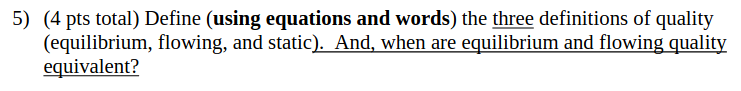

Equilibrium Quality:

$x_{eq} = \frac{h - h_f}{h_{fg}} = \frac{h - h_f}{h_g - h_f}$

The equilibrium quality is based on the enthalpy, which considers the total energy of the vapor and liquid. These values are dependent on the pressure and volume of the vapor and liquid.

Flowing Quality:

$x_{flow} = \frac{\dot m_v}{\dot m_{tot}}$

Flow quality is the mass flow rate of the vapor compared to the total mass flow rate. It is the proportion of flow that is vapor by mass.

Static Quality:

$x_{static} = \frac{m_v}{m_{tot}}$

Static quality is the same as flowing quality, but instead is comparing quantities of mass in general, and does not consider flow.

Flowing and equilibrium quality are equivalent when only one type of material is involved, such as water and steam, and are equivalent only within the steam dome. Equilibrium quality create values less than zero and greater than one when calculated outside the steam dome, but flowing quality can not produce values less than zero or greater than one.

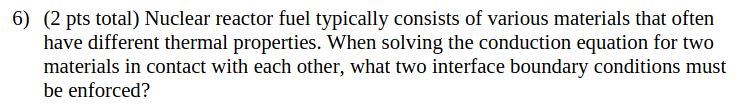

1. The flux on both sides of the interface must be the same magnitude.
2. The temperature must be the same on both sides of the interface.

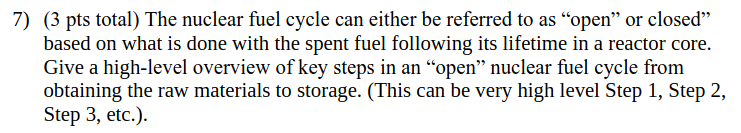

1. Uranium ore is extracted from the ground
2. The ore is then processed physically and chemically to obtain highly pure Uranium Hexafluoride (UF6)
3. (OPTIONAL FOR CANDU) This gas goes through 'enrichment,' where the percentage of 235U is increased
4. UF6 is converted back into a poweder of choice (usually UO2), and packed into fuel pellet shapes.
5. These pelets are stacked into rods, which are bundled into assemblies, and used as nuclear fuel
6. When the fuel is exhausted, the fuel assemblies are temporarily stored at the reactor plant's spent fuel pool
7. In the open cycle, the fuel mateirals are then put into dry cask storage and put... somewhere. Possibly under a mountain in the desert in a highly secure facility.

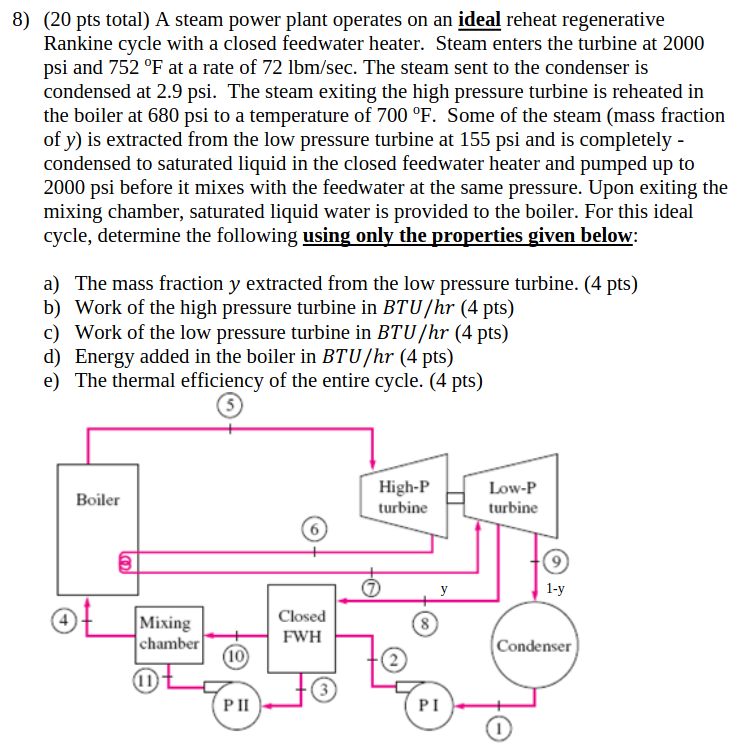

In [23]:
class ThermodynamicProperties:
    def __init__(self):
        self.sat_prop = {
            2000: {  # psi
                "vf": 0.025635,  # ft3/lbm
                "hf": 671.797,  # BTU/lbm
                "sf": 0.86284,  # BTU/lbm-F
                "vg": 0.18813,  # ft3/lbm
                "hg": 1137.20,  # BTU/lbm
                "sg": 1.2872  # BTU/lbm-F
            },
            680: {
                "vf": 0.02044,  # ft3/lbm
                "hf": 487.79,  # BTU/lbm
                "sf": 0.6889,  # BTU/lbm-F
                "vg": 0.67614,  # ft3/lbm
                "hg": 1202.35,  # BTU/lbm
                "sg": 1.4335  # BTU/lbm-F
            },
            155: {
                "vf": 0.01812,  # ft3/lbm
                "hf": 333.42,  # BTU/lbm
                "sf": 0.51747,  # BTU/lbm-F
                "vg": 2.92183,  # ft3/lbm
                "hg": 1195.02,  # BTU/lbm
                "sg": 1.58631  # BTU/lbm-F
            },
            2.9: {
                "vf": 0.01629,  # ft3/lbm
                "hf": 108.07,  # BTU/lbm
                "sf": 0.19869,  # BTU/lbm-F
                "vg": 122.5419,  # ft3/lbm
                "hg": 1121.64,  # BTU/lbm
                "sg": 1.88863  # BTU/lbm-F
            }
        }
        self.other_prop = {
            2000: { # psi
                "T": 752, #F
                "h": 1293.1, #BTU/lbm
                "s": 1.42335 #BTU/lbm-F
            }, 
            680: { # psi
                "T": 700, #F
                "h": 1346.05, #BTU/lbm
                "s": 1.57063 #BTU/lbm-F
            }
        }

givens = ThermodynamicProperties().sat_prop
m_dot = 72 #lbm/s
print(givens.get(2000)['hg'])

1137.2


| Stage |  Temperature | Pressure | Quality | Enthalpy | Entropy |
| ----- |----- | ----- | ----- | -----| ----- |
| 1 - Condenser / P1 | |2.9 psi | 0 | 108.07 BTU/lbm | 0.19869 BTU/lbm-F|
| 2 - P1/CFWH | |2000 psi|0| 671.797 BTU/lbm| 0.86284 BTU/lbm-F |
| 3 - CFHW/P2 | |155 psi| 0 | 333.42 BTU/lbm| 0.51747 BTU/lbm-F|
| 4 - Mix/Boiler | |2000 psi|0| 671.797 BTU/lbm | 0.86284 BTU/lbm-F|
| 5 - Boiler/HPT |752 F| 2000 psi | |1293.1 BTU/lbm| 1.42335 BTU/lbm-F |
| 6 - HPT/Boiler | |680 psi| | |$s_6$ = $s_5$ = 1.42335 BTU/lbm-F |
| 7 - Boiler/LPT |700 F|680 psi| |1346.05 BTU/lbm| 1.57063 BTU/lbm-F|
| 8 - LPT/CFWH | |155 psi| | |$s_8$ = $s_7$ = 1.57063 BTU/lbm-F |
| 9 - LPT/Condenser | |2.9 psi| | |$s_9$ = $s_7$ = 1.57063 BTU/lbm-F|
| 10 - CFWH/Mix | | 2000 psi |0| 671.797 BTU/lbm | 0.86284 BTU/lbm-F|
| 11 - P2/Mix | | 2000 psi |0| 671.797 BTU/lbm| 0.86284 BTU/lbm-F|






To find the mass fraction, we will utilize the conservation of mass and conservation of energy:
$$ \dot m_8 + \dot m_9 = \dot m_7 $$
$$ \dot m_8 h_8 + \dot m_9 h_9 + W_{LPT}= \dot m_7 h_7 $$

Which when subsituting in $\dot m_8 = y \dot m_7$ and $\dot m_9 = (1-y) \dot m_7$, we get one key equation:
$$ y h_8 + (1-y) h_9 + W_{LPT}= h_7 $$
$$ y h_8 + h_9 - y h_9 + W_{LPT}= h_7 $$
$$ y = \frac{h_7 - h_9 - W_{LPT}}{h_8-h_9} $$
We know $h_7$ but do not know $h_8$, or $h_9$. We can find the enthalpies using the entropies, however, and then solve the system to find the mass flow fraction.

In [24]:
# Find quality at 8
x_8 = (1.57063 - givens.get(155)['sf']) / (givens.get(155)['sg'] - givens.get(155)['sf'])
print(f'x_8 = {x_8:.3f}')

# Find enthalpy at 8
h_8 = x_8 * (givens.get(155)['hg'] - givens.get(155)['hf']) + givens.get(155)['hf']
print(f'h_8 = {h_8:.3f} BTU/lbm')

# Find Quality at 9
x_9 = (1.57063 - givens.get(2.9)['sf']) / (givens.get(2.9)['sg'] - givens.get(2.9)['sf'])
print(f'x_9 = {x_9:.3f}')

# Find enthalpy at 9
h_9 = x_9 * (givens.get(2.9)['hg'] - givens.get(2.9)['hf']) + givens.get(2.9)['hf']
print(f'h_9 = {h_9:.3f} BTU/lbm')

x_8 = 0.985
h_8 = 1182.380 BTU/lbm
x_9 = 0.812
h_9 = 930.914 BTU/lbm


Now we also don't know $W_{LPT}$. We need a second equation to find $y$. We get it from the closed water heater, which conserves energy between the two streams:

$$ \dot m_3 h_3 + \dot m_10 h_10 = \dot m_2 h_2 + \dot m_8 + h_8 $$

But THIS equation has us going further down the rabbit hole. Must find pump works, then HPT work, then finally we can take the LPT work from that. THEN! We can find y.


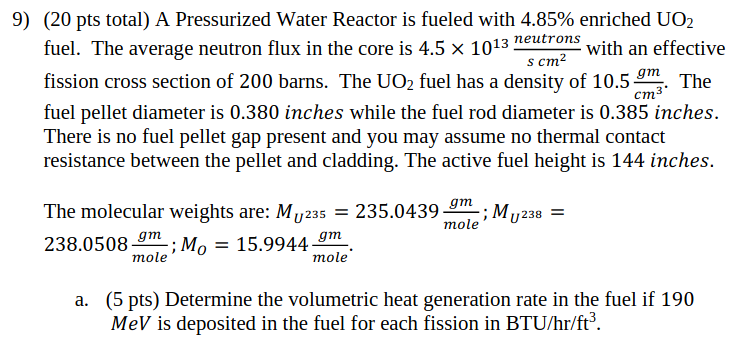

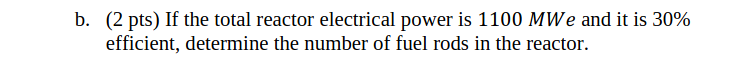

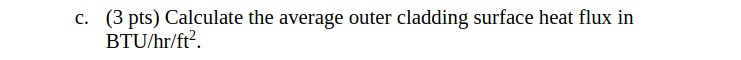

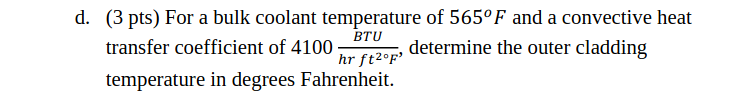

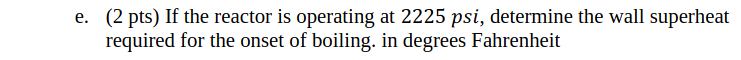

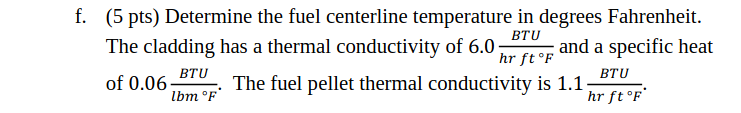

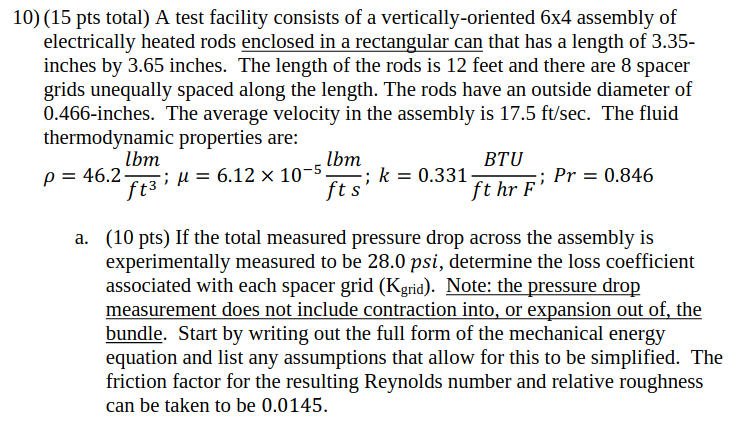

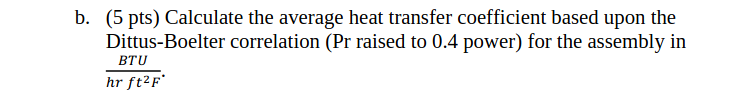